## Задача 1

In [2]:
f = open("sentences.txt")
lines = f.readlines()

In [3]:
import re
lines = [x.lower() for x in lines]
splitted = [re.split('[^a-z]+', x) for x in lines]
splitted = [[y for y in x if y] for x in splitted]
words = {}
for i in range(len(splitted)):
    for j in range(len(splitted[i])):
        if words.get(splitted[i][j]) == None:
            counts = [0]*len(splitted)
            counts[i] = 1
            words[splitted[i][j]] = counts
        else:
            (words[splitted[i][j]])[i] += 1
            
print(len(list(words.values())[15]))

22


In [4]:
import numpy as np
matrix = np.array([y for (x, y) in words.items()]).transpose()
print(matrix.shape)

(22, 254)


In [15]:
from scipy.spatial.distance import cosine

first = matrix[0]
distances = [(cosine(first, matrix[i]), i) for i in range(1, len(matrix[1:, 0]))]
print(sorted(distances))

[(0.7327387580875756, 6), (0.77708871496985887, 4), (0.83281653622739416, 10), (0.83964325485254543, 12), (0.84063618542208085, 16), (0.84275727449171223, 20), (0.86447381456421235, 2), (0.87035925528956715, 13), (0.87401184233025764, 14), (0.88047713906656067, 11), (0.88427248752843102, 8), (0.88854435748492944, 19), (0.89517151632780823, 3), (0.90550888174769317, 9), (0.92587506833388988, 7), (0.94023856953328033, 5), (0.94427217874246472, 15), (0.94427217874246472, 18), (0.95275444087384664, 1), (0.95664450152379399, 17)]


## Задача 2

In [16]:
from scipy.linalg import solve
from matplotlib import pylab as plt
import math
%matplotlib inline

In [19]:
def func(x):
    return math.sin(x/5) * math.exp(x/10) + 5 * math.exp(-x/2)

In [33]:
f1 = func(1)
f15 = func(15)

b = np.array([f1, f15])
a = np.array([[1, 1], [1, 15]])
w = solve(a, b)
print(w)

[ 3.43914511 -0.18692825]


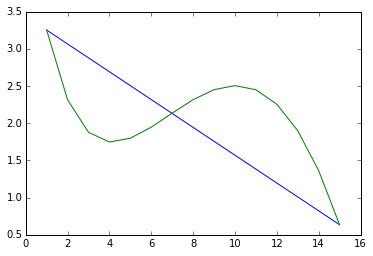

In [34]:
x = np.arange(1, 16)

yp = w[0] + w[1] * x
yf = [func(f) for f in x]

plt.plot(x, yp)
plt.plot(x, yf)
plt.show()

In [35]:
b = np.array([func(1), func(8), func(15)])
a = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
w = solve(a, b)
print(w)

[ 3.32512949 -0.06531159 -0.00760104]


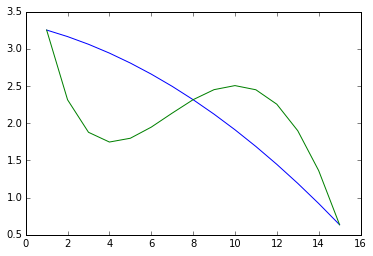

In [36]:
yp = w[0] + w[1] * x + w[2] * (x ** 2)

plt.plot(x, yp)
plt.plot(x, yf)
plt.show()

In [37]:
b = np.array([func(1), func(4), func(10), func(15)])
a = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 225*15]])

w = solve(a, b)
print(w)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


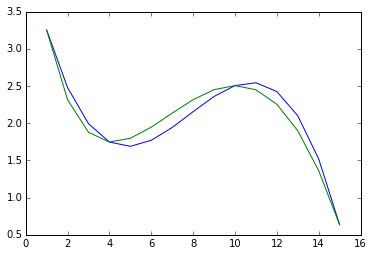

In [38]:
yp = w[0] + w[1] * x + w[2] * (x ** 2) + w[3] * (x ** 3)

plt.plot(x, yp)
plt.plot(x, yf)
plt.show()